In [13]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import CustomBusinessDay

In [3]:
df = pd.read_csv(r'/Users/jitendrashirsat/Documents/Time-Series/TimeSeries/Last_Five_years_Lotto.csv'\
                ,index_col='RDate',parse_dates=True)

In [4]:
df.head(5)

,Key_id,First_P,Second_P,Third_P,Fourth_P,Fifth_P,Sixth_P,Result,Total,Product
RDate,,,,,,,,,,
2016-01-02,8302779,10,19,23,28,31,32,Roll,143,121381120
2016-01-06,2383816,2,15,25,43,45,46,Roll,176,66757500
2016-01-09,2173466,2,11,14,28,29,34,Roll,118,8503264
2016-01-13,8169338,10,14,26,37,42,47,Roll,176,265858320
2016-01-16,9502701,14,18,25,27,33,44,Roll,161,246985200


In [5]:
column_Total = df[['Total']]

In [6]:
dfTotal = column_Total.copy()

In [7]:
dfTotal.head(5)

,Total
RDate,
2016-01-02,143
2016-01-06,176
2016-01-09,118
2016-01-13,176
2016-01-16,161


<AxesSubplot:xlabel='RDate'>

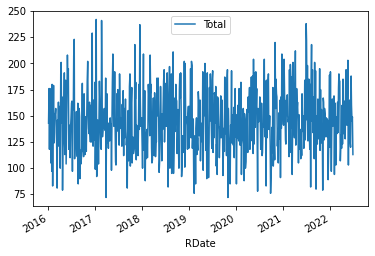

In [8]:
dfTotal.plot()

In [9]:
alpha = 0.2

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [17]:
ses = SimpleExpSmoothing(dfTotal['Total'])

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
weekmask_egypt = 'Wed Sat'
bday_egypt = CustomBusinessDay (weekmask=weekmask_egypt)

In [15]:
dfTotal.index.freq=bday_egypt

In [16]:
dfTotal.index

DatetimeIndex(['2016-01-02', '2016-01-06', '2016-01-09', '2016-01-13',
               '2016-01-16', '2016-01-20', '2016-01-23', '2016-01-27',
               '2016-01-30', '2016-02-03',
               ...
               '2022-05-28', '2022-06-01', '2022-06-04', '2022-06-08',
               '2022-06-11', '2022-06-15', '2022-06-18', '2022-06-22',
               '2022-06-25', '2022-06-29'],
              dtype='datetime64[ns]', name='RDate', length=678, freq='C')

In [18]:
ses = SimpleExpSmoothing(dfTotal['Total'],initialization_method='legacy-heuristic')

In [19]:
res = ses.fit(smoothing_level=alpha,optimized=False)

In [20]:
res

In [21]:
res.predict(start=df.index[0],end=df.index[-1])

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RDate
2016-01-02    143.000000
2016-01-06    143.000000
2016-01-09    149.600000
2016-01-13    143.280000
2016-01-16    149.824000
                 ...    
2022-06-15    145.923626
2022-06-18    154.338901
2022-06-22    155.471121
2022-06-25    153.376897
2022-06-29    152.501517
Freq: C, Length: 678, dtype: float64

In [25]:
dfTotal['SESTotal'] = res.predict(start=df.index[0],end=df.index[-1])

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [26]:
np.allclose(dfTotal['SESTotal'],res.fittedvalues)

True

<AxesSubplot:xlabel='RDate'>

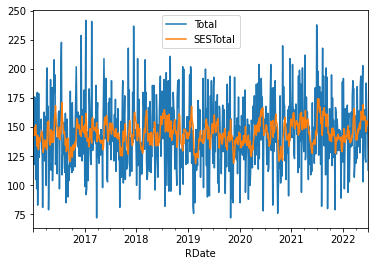

In [27]:
dfTotal.plot()

In [28]:
N_test = 12
train = dfTotal.iloc[:-N_test]
test = dfTotal.iloc[-N_test:]

In [30]:
ses = SimpleExpSmoothing(train['Total'],
                        initialization_method='legacy-heuristic')
res = ses.fit()

In [31]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='RDate'>

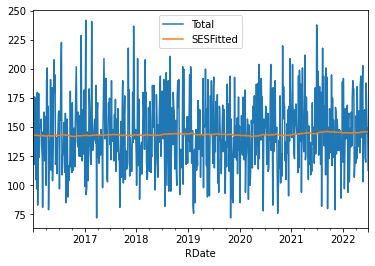

In [32]:
dfTotal.loc[train_idx,'SESFitted'] = res.fittedvalues
dfTotal.loc[test_idx,'SESFitted'] = res.forecast(N_test)
dfTotal[['Total','SESFitted']].plot()

In [33]:
res.params

{'smoothing_level': 0.005,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 143.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
dfTotal.tail(8)

,Total,SESTotal,SESFitted
RDate,,,
2022-06-04,165,158.132083,146.038547
2022-06-08,124,159.505666,146.038547
2022-06-11,120,152.404533,146.038547
2022-06-15,188,145.923626,146.038547
2022-06-18,160,154.338901,146.038547
2022-06-22,145,155.471121,146.038547
2022-06-25,149,153.376897,146.038547
2022-06-29,113,152.501517,146.038547
